In [6]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

In [3]:
image_path = "../output_videos/cropped_img.jpg"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

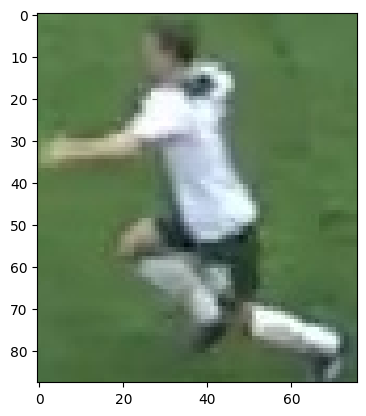

In [4]:
plt.imshow(image)
plt.show()

# Take the top Half of the image

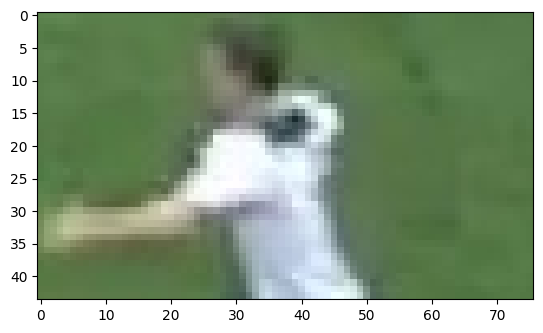

In [5]:
top_half_image = image[0: int(image.shape[0]/2), :]
plt.imshow(top_half_image)
plt.show()

# Cluster the image into two clusters

c:\Users\Admin_PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


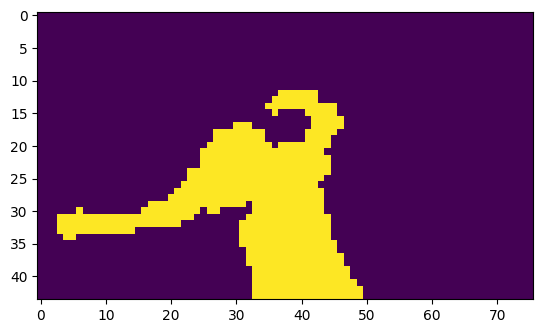

In [10]:
#Reshape the image into 2d array
image_2d = top_half_image.reshape(-1,3)

#perform k-means clustering with two clusters
kmeans = KMeans(n_clusters = 2, random_state=0).fit(image_2d)

# Gets the cluster labels
labels = kmeans.labels_

#reshape the labels into the original image shape
clustered_image = labels.reshape(top_half_image.shape[0], top_half_image.shape[1])

#Display the clustered image
plt.imshow(clustered_image)
plt.show()

In [11]:
corner_clusters = [clustered_image[0,0], clustered_image[0,-1], clustered_image[-1, 0], clustered_image[-1,-1]]
non_player_cluster = max(set(corner_clusters), key = corner_clusters.count) # To find the class that is most abandunt, assigned it to be the background
print(non_player_cluster)

0


In [14]:
player_cluster = 1-non_player_cluster
print(player_cluster)

1


In [15]:
kmeans.cluster_centers_[player_cluster]

array([199.01627486, 209.28933092, 212.19168174])